# Data Visualization with Matplotlib

This notebook is a **learning resource** for Matplotlib. We'll cover basics (line, bar, scatter, pie), customization, subplots, annotations, reusable plotting functions, and finish with a small exercise using synthetic data.

Run the cells, read the explanations, and try the exercise at the end.

## 1. Introduction

- **What is Matplotlib?** A foundational Python plotting library that provides fine-grained control over figures and axes.
- **Why learn it?** Many higher-level plotting libraries (including Seaborn) build on top of Matplotlib. Understanding Matplotlib helps you customize plots and create publication-ready figures.
- **What you'll learn:** basic plots, styling, subplots, annotations, building plotting functions, and a practice exercise.

In [31]:
# 2. Getting started: imports & notebook setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


np.random.seed(19680801)

## 3. Sample / synthetic data

We'll create small synthetic datasets we'll reuse in examples. Synthetic data is great for teaching because it's reproducible and focused.


In [32]:
# Simple numeric sequences and random data
x = np.linspace(0, 2, 500)
linear = x
quadratic = x**2
cubic = x**3

# Data for scatter example ( c and s for color and size)
data_dict = {
    'a': np.arange(50),
    'c': np.random.randint(0, 50, 50),
    'd': np.abs(np.random.randn(50)) * 100
}
data_dict['b'] = data_dict['a'] + 10 * np.random.randn(50)

# Data for bar / categorical examples
months = np.arange(1,13)
sales = np.random.randint(30, 100, size=12)
colors = ['green','purple','red','orange','blue','green','purple','red','orange','blue','green','purple']


## 4. Basic plots (Line, Bar, Scatter, Pie)

We'll start with the most common plot types and explain how to add labels and titles.

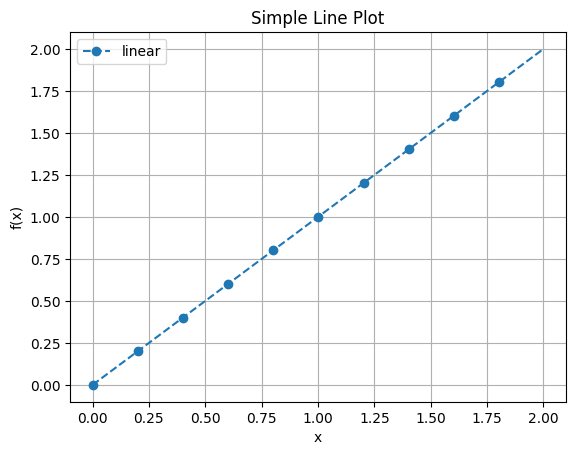

In [33]:
# 4.1 Line plot (single series)
fig, ax = plt.subplots()
ax.plot(x, linear, label='linear', linestyle='--', marker='o', markevery=50)
ax.set_title('Simple Line Plot')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.grid(True)
ax.legend()
plt.show()

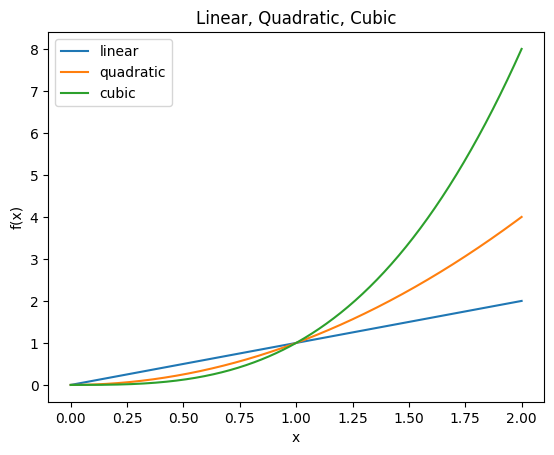

In [34]:
# 4.2 Multiple lines on same axes
fig, ax = plt.subplots()
ax.plot(x, linear, label='linear')
ax.plot(x, quadratic, label='quadratic')
ax.plot(x, cubic, label='cubic')
ax.set_title('Linear, Quadratic, Cubic')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.legend()
plt.show()

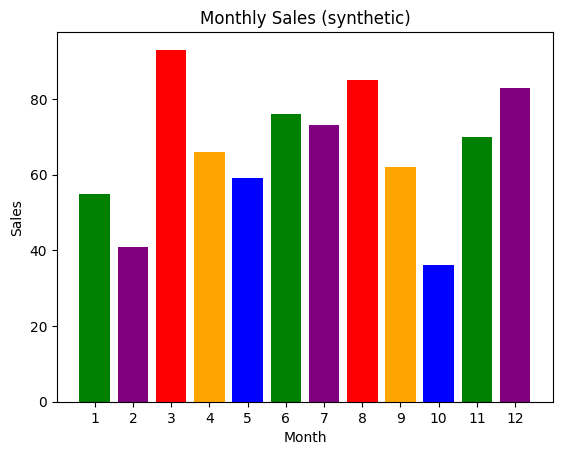

In [35]:
# 4.3 Bar chart (categorical / ordinal data)
fig, ax = plt.subplots()
ax.bar(months, sales, color=colors)
ax.set_xlabel('Month')
ax.set_ylabel('Sales')
ax.set_title('Monthly Sales (synthetic)')
ax.set_xticks(months)
plt.show()

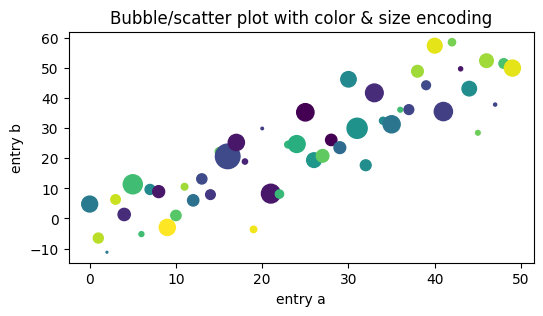

In [36]:
# 4.4 Scatter plot (showing how color and size can encode data)
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter('a', 'b', c='c', s='d', data=data_dict, cmap='viridis')
ax.set_xlabel('entry a')
ax.set_ylabel('entry b')
ax.set_title('Bubble/scatter plot with color & size encoding')
plt.show()

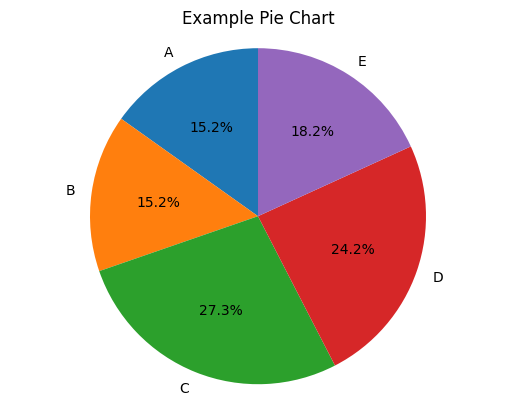

In [37]:
# 4.5 Pie chart (use sparingly; for proportions)
fig, ax = plt.subplots()
pie_data = np.random.randint(1, 10, size=5)
labels = ['A','B','C','D','E']
ax.pie(pie_data, labels=labels, autopct='%1.1f%%', startangle=90)
ax.set_title('Example Pie Chart')
ax.axis('equal')  # keep it circular
plt.show()

## 5. Customization: titles, labels, legends, styles, and annotations

Customization makes plots informative and presentable. Below are common customizations and annotation examples.

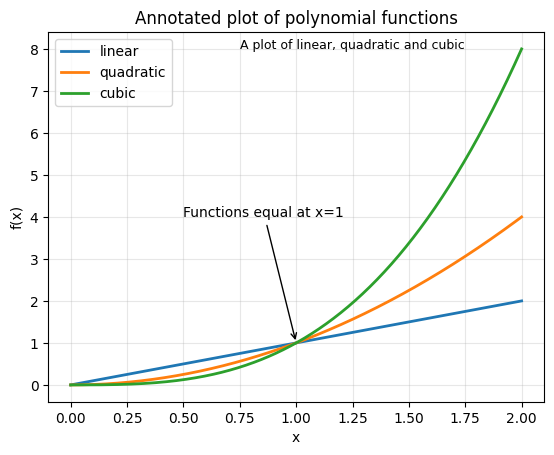

In [38]:
# Example of customization and annotation
fig, ax = plt.subplots()
ax.plot(x, linear, label='linear', linewidth=2)
ax.plot(x, quadratic, label='quadratic', linewidth=2)
ax.plot(x, cubic, label='cubic', linewidth=2)

ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_title('Annotated plot of polynomial functions')
ax.legend(loc='upper left')
ax.grid(alpha=0.3)

# Annotation: point where functions cross (x=1)
ax.annotate('Functions equal at x=1', xy=(1,1), xytext=(0.5, 4),
            arrowprops={'facecolor':'black','arrowstyle':'->'})
ax.text(0.75, 8, 'A plot of linear, quadratic and cubic', fontsize=9)
plt.show()

## 6. Subplots: combining multiple plots in one figure

Subplots are essential for dashboards and side-by-side comparisons. We'll show `plt.subplots()` usage and layout options.

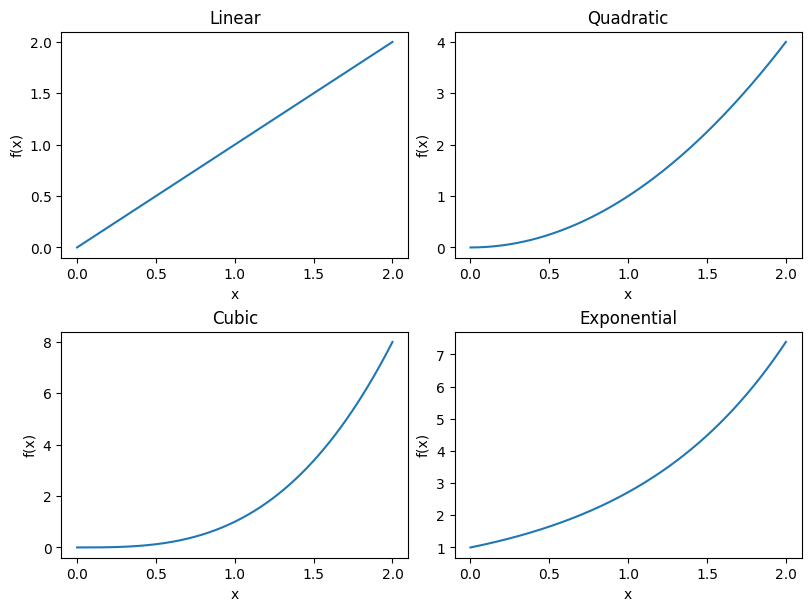

In [39]:
# 2x2 grid of related plots
fig, axes = plt.subplots(2,2, figsize=(8,6), constrained_layout=True)
axes[0,0].plot(x, linear); axes[0,0].set_title('Linear')
axes[0,1].plot(x, quadratic); axes[0,1].set_title('Quadratic')
axes[1,0].plot(x, cubic); axes[1,0].set_title('Cubic')
axes[1,1].plot(x, np.exp(x)); axes[1,1].set_title('Exponential')

for ax in axes.flat:
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')

plt.show()

## 7. Reusable plotting functions

When building multiple similar plots, write small helper functions to reduce repetition and keep style consistent.

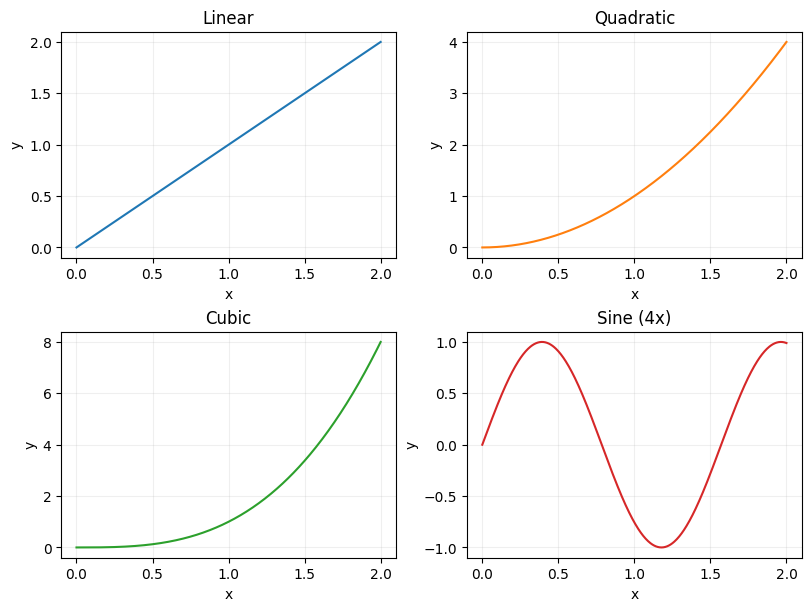

In [40]:
def myplotter(ax, xdata, ydata, param_dict=None, title=None):
    """Plot helper: draws on given axes and applies params from param_dict."""
    if param_dict is None:
        param_dict = {}
    ax.plot(xdata, ydata, **param_dict)
    if title:
        ax.set_title(title)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.grid(alpha=0.2)
    return ax

# Demonstrate helper in a 2x2 grid
fig, axes = plt.subplots(2,2, figsize=(8,6), constrained_layout=True)
myplotter(axes[0,0], x, linear, {'color':'C0'}, 'Linear')
myplotter(axes[0,1], x, quadratic, {'color':'C1'}, 'Quadratic')
myplotter(axes[1,0], x, cubic, {'color':'C2'}, 'Cubic')
myplotter(axes[1,1], x, np.sin(4*x), {'color':'C3'}, 'Sine (4x)')
plt.show()

## 8. Additional plot types & short notes

- **Histograms**: for distributions
- **Boxplots**: for distribution and outliers
- **Stacked / grouped bars**: for comparisons
- Matplotlib can be combined with Pandas plotting conveniences (e.g., `df.plot()`), but explicit Matplotlib gives more control.

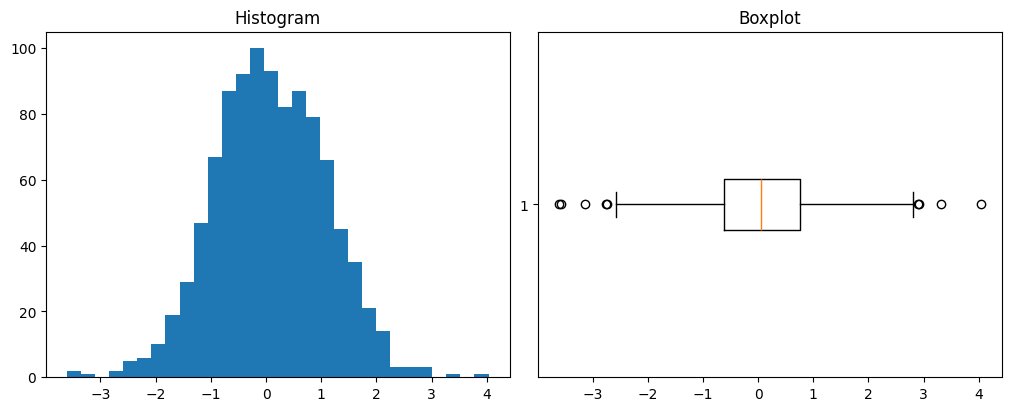

In [41]:
# Histogram and boxplot examples
rnd = np.random.randn(1000)
fig, axes = plt.subplots(1,2, figsize=(10,4), constrained_layout=True)
axes[0].hist(rnd, bins=30)
axes[0].set_title('Histogram')
axes[1].boxplot(rnd, vert=False)
axes[1].set_title('Boxplot')
plt.show()

## 9. Quick tips & best practices

- Use descriptive titles and axis labels.
- Keep figures focused — avoid too many ink elements.
- Use color to encode meaning, not decoration.
- Always label legends and annotate important insights.
- For reproducible visuals, set seeds for random data when teaching.

## 10. Exercise (practice)

Using **synthetic data**, complete the tasks below. Try to produce clear, annotated visuals and short captions (1–2 sentences) describing the insight.

**Tasks**:
1. Create a line chart showing cumulative sales over 12 months based on the `sales` array. Add axis labels and a title.
2. Create a bar chart comparing monthly sales but sorted by value (highest to lowest). Add labels for top 3 months.
3. Create a scatter plot using `data_dict` where marker size encodes `'d'` and color encodes `'c'`. Add a colorbar.
4. Create a histogram of `rnd` and overlay a KDE curve (use `np.histogram` + simple smoothing or use `scipy.stats` if available).

You can add more plots if you like. When done, write a one-paragraph summary of what the visuals reveal.

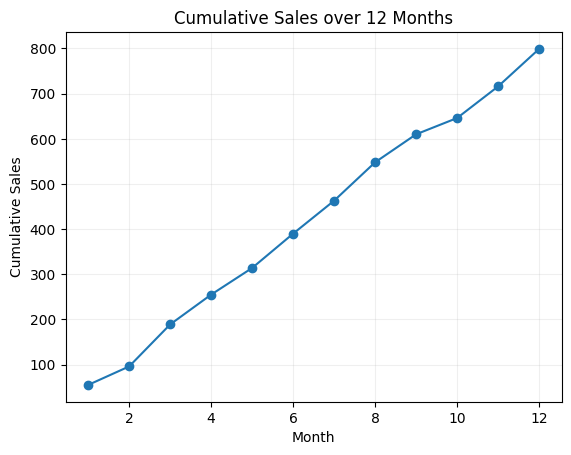

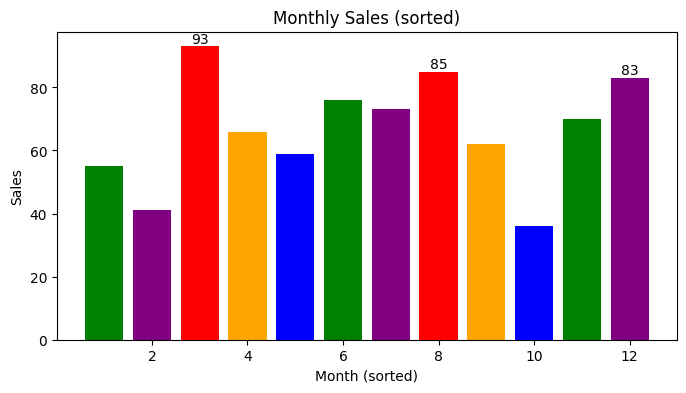

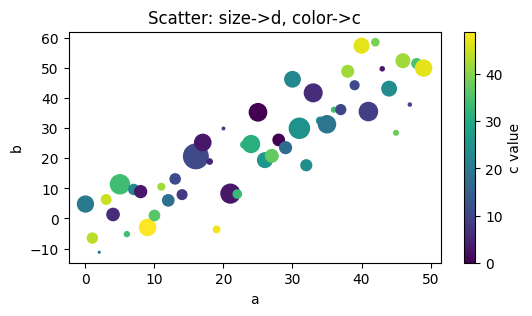

ModuleNotFoundError: No module named 'scipy'

In [42]:
# Starter code to help with the exercise (you can modify and expand)
import numpy as np
import matplotlib.pyplot as plt

# 1. Cumulative sales line chart
cum_sales = np.cumsum(sales)
fig, ax = plt.subplots()
ax.plot(months, cum_sales, marker='o')
ax.set_xlabel('Month')
ax.set_ylabel('Cumulative Sales')
ax.set_title('Cumulative Sales over 12 Months')
ax.grid(alpha=0.2)
plt.show()

# 2. Bar chart sorted by sales (with top-3 labels)
order = np.argsort(sales)[::-1]
fig, ax = plt.subplots(figsize=(8,4))
ax.bar(months[order], sales[order], color=[colors[i-1] for i in months[order]])
ax.set_xlabel('Month (sorted)')
ax.set_ylabel('Sales')
ax.set_title('Monthly Sales (sorted)')

# label top 3
for i in range(3):
    m = months[order][i]
    s = sales[order][i]
    ax.text(m, s + 1, str(s), ha='center')
plt.show()

# 3. Scatter plot with colorbar
fig, ax = plt.subplots(figsize=(6,3))
sc = ax.scatter(data_dict['a'], data_dict['b'], c=data_dict['c'], s=data_dict['d'], cmap='viridis')
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_title('Scatter: size->d, color->c')
plt.colorbar(sc, ax=ax, label='c value')
plt.show()

# 4. Histogram of rnd with simple KDE-like smoothing (using convolution)
hist_vals, bin_edges = np.histogram(rnd, bins=30, density=True)
centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
from scipy.ndimage import gaussian_filter1d
smoothed = gaussian_filter1d(hist_vals, sigma=1.5)
fig, ax = plt.subplots()
ax.bar(centers, hist_vals, width=bin_edges[1]-bin_edges[0], alpha=0.6, label='hist')
ax.plot(centers, smoothed, label='smoothed KDE-like', linewidth=2)
ax.set_title('Histogram with smoothed curve')
ax.legend()
plt.show()


## 11. Summary & Resources

- **Recap:** Matplotlib gives you control over every element in a figure. Learn line plots, bar charts, scatter plots, subplots, annotations, and build reusable plotting functions.
- **Next steps:** practice with real datasets, then learn Seaborn for faster statistical plotting and attractive defaults.

**Resources**:
- Matplotlib docs: https://matplotlib.org/stable/contents.html
- Matplotlib gallery (lots of examples): https://matplotlib.org/stable/gallery/index.html
- Seaborn docs (when you're ready): https://seaborn.pydata.org
